<a href="https://colab.research.google.com/github/juanninocruz/Estadistica/blob/main/02_Act02_ColumnaVertebral_V01_1corrida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://d1yjjnpx0p53s8.cloudfront.net/styles/logo-thumbnail/s3/102012/logo_unab.png?itok=hZ5x30O2" width="240" height="240" align="right"/>

<h1><b>
Fundamentos y Aplicaciones de la Inteligencia Artificial<br>
Modelos supervisados para predecir problemas de columna
</b></h1>


Presentado por:<br>
<u>Juan Carlos Niño Cruz</u><br>
<u>Giulianno Farid Pimienta Chaparro</u><br>
Fecha: XX/10/2025<br><br>


## <b>1.  Importación de librerías necesarias</b>

In [37]:
# Importar librerías:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import gaussian_kde

# Warnings
import warnings
warnings.filterwarnings("ignore")


## <b>2.  Carga del Dataset</b>

In [38]:
# Cargar DataSet desde GitHub

file_path = 'https://raw.githubusercontent.com/giuliannof/MCD-Semestre02Curso01/refs/heads/main/columna_vertebral.txt'  # Ruta de GitHub

df = pd.read_csv(file_path)


## <b>3.  Análisis exploratorio de datos (EDA)</b>

<b>3.1. Información general del DataSet</b>

Eliminar espacios en blanco en los nombres de las columnas

In [39]:
# Mostrar los nombres de las columnas (Originales)
print("Nombres Originales:")
for col in df.columns:
  print(f"'{col}'")

# Eliminar espacios en blanco en los nombres de las columnas
df.columns = [col.strip() for col in df.columns]

# Mostrar los nombres de las columnas (Actualizados)
print("\nNombres Actualizados:")
for col in df.columns:
  print(f"'{col}'")


Nombres Originales:
'índice'
' incidencia_pélvica'
' inclinación_pélvica'
' ángulo_lordosis_lumbar'
' pendiente_sacra'
' radio_pélvico'
' grado_espondilolistesis'
' clase'

Nombres Actualizados:
'índice'
'incidencia_pélvica'
'inclinación_pélvica'
'ángulo_lordosis_lumbar'
'pendiente_sacra'
'radio_pélvico'
'grado_espondilolistesis'
'clase'


Se listan los primeros 10 registros del conjunto de datos.

In [40]:
# Mostrar los primeros 10 registros del conjunto de datos

df.head(10)

,índice,incidencia_pélvica,inclinación_pélvica,ángulo_lordosis_lumbar,pendiente_sacra,radio_pélvico,grado_espondilolistesis,clase
0,0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
5,5,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1
6,6,53.432928,15.864336,37.165934,37.568592,120.567523,5.988551,1
7,7,45.366754,10.755611,29.038349,34.611142,117.270067,-10.675871,1
8,8,43.790190,13.533753,42.690814,30.256437,125.002893,13.289018,1
9,9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,1


Se obtiene la información general del conjunto de datos.

In [41]:
# Cantidad de registro, cantidad de atributos y descripción general de atributos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   índice                   310 non-null    int64  
 1   incidencia_pélvica       310 non-null    float64
 2   inclinación_pélvica      310 non-null    float64
 3   ángulo_lordosis_lumbar   310 non-null    float64
 4   pendiente_sacra          310 non-null    float64
 5   radio_pélvico            310 non-null    float64
 6   grado_espondilolistesis  310 non-null    float64
 7   clase                    310 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 19.5 KB


In [42]:
# Corroborar si hay valores (nulos) en el (dataset) y su conteo por columna

valores_nulos = df.isnull().sum()
print("Valores nulos por columna:")
print(valores_nulos)

Valores nulos por columna:
índice                     0
incidencia_pélvica         0
inclinación_pélvica        0
ángulo_lordosis_lumbar     0
pendiente_sacra            0
radio_pélvico              0
grado_espondilolistesis    0
clase                      0
dtype: int64


<b>3.2. Validación de valores en atributos (Categóricos y numéricos)</b>

Verificar valores de posibles atributos categóricos.

In [43]:
# Valores del atributo (clase)

valores_unicos = df['clase'].unique()
print(valores_unicos)

df.clase.value_counts()

[1 0]


,count
clase,
1,210
0,100


Verificar valores de atributos numéricos.

In [44]:
# Valor mínimo, máximo, media y mediana de los atributos numéricos
# (índice, incidencia_pélvica, inclinación_pélvica, ángulo_lordosis_lumbar, pendiente_sacra, radio_pélvico, grado_espondilolistesis)

print("índice")
valores_unicos = df['índice'].nunique()
print(f"Valores únicos: {valores_unicos}\n")

print("incidencia_pélvica")
variable = df["incidencia_pélvica"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

print("inclinación_pélvica")
variable = df["inclinación_pélvica"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

print("ángulo_lordosis_lumbar")
variable = df["ángulo_lordosis_lumbar"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

print("pendiente_sacra")
variable = df["pendiente_sacra"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

print("radio_pélvico")
variable = df["radio_pélvico"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

print("grado_espondilolistesis")
variable = df["grado_espondilolistesis"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

índice
Valores únicos: 310

incidencia_pélvica
mínima:		26.14792141
máximo:		129.8340406
media:		60.49665292951613
mediana:	58.691038135

inclinación_pélvica
mínima:		-6.554948347
máximo:		49.4318636
media:		17.542821967970966
mediana:	16.35768863

ángulo_lordosis_lumbar
mínima:		14.0
máximo:		125.7423855
media:		51.93092960345161
mediana:	49.56239828

pendiente_sacra
mínima:		13.3669307
máximo:		121.4295656
media:		42.95383096141936
mediana:	42.404912075

radio_pélvico
mínima:		70.08257486
máximo:		163.0710405
media:		117.92065502380645
mediana:	118.2681783

grado_espondilolistesis
mínima:		-11.05817866
máximo:		418.5430821
media:		26.296694437867735
mediana:	11.767933769999999



## <b>4. Análisis univariado y gestión de datos atípicos</b>

<b>4.1. Incidencia pélvica</b>

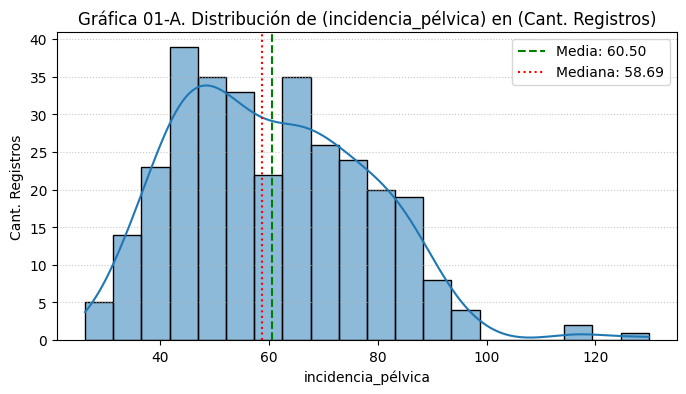

In [45]:
# Histograma de incidencia_pélvica

plt.figure(figsize=(8, 4))
sns.histplot(df['incidencia_pélvica'], bins=20, kde=True)

# Calcular media y mediana
media = df['incidencia_pélvica'].mean()
mediana = df['incidencia_pélvica'].median()

# Añadir líneas de media y mediana
plt.axvline(media, color='green', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='red', linestyle=':', label=f'Mediana: {mediana:.2f}')

plt.title('Gráfica 01-A. Distribución de (incidencia_pélvica) en (Cant. Registros)')
plt.xlabel('incidencia_pélvica')
plt.ylabel('Cant. Registros')
plt.legend() # Mostrar la leyenda para identificar las líneas
plt.grid(axis='y', linestyle='dotted', alpha=0.7) # Añadir líneas de cuadrícula punteadas en el eje Y
plt.show()

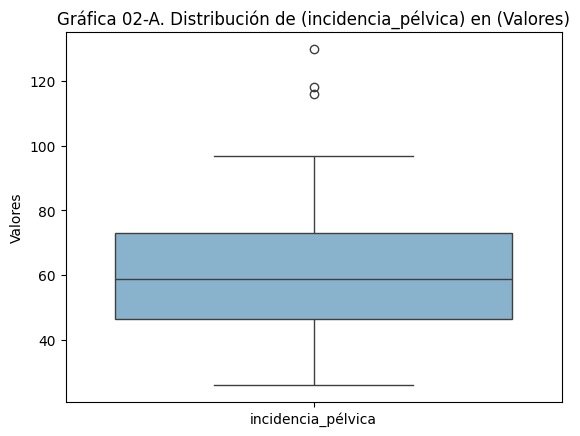

In [46]:
# Boxplots de incidencia_pélvica

sns.boxplot(data=df[["incidencia_pélvica"]], color="#7EB6D8")
plt.title("Gráfica 02-A. Distribución de (incidencia_pélvica) en (Valores)")
# plt.xlabel("Título eje X")
plt.ylabel("Valores")
plt.show()

In [47]:
# Gestión de datos atípicos
df_sin_atipicos = df.copy()

# Winsorización (Reemplazar los valores atípicos por un valor máximo permitido)
# Si los outliers son reales pero extremos
df_sin_atipicos['incidencia_pélvica'] = df_sin_atipicos['incidencia_pélvica'].clip(upper=100)

# Imputación por la media (Reemplazar los valores atípicos por la media)
# Si los datos son simétricos (distribución normal) y los outliers son errores pequeños o pocos
# media = df_sin_atipicos['incidencia_pélvica'].mean()
# df_sin_atipicos['incidencia_pélvica'] = np.where(df_sin_atipicos['incidencia_pélvica'] > 100, media, df_sin_atipicos['incidencia_pélvica'])

# Imputación por la mediana (Reemplazar los valores atípicos por la mediana)
# Si la distribución es asimétrica o los extremos son grandes.
# mediana = df_sin_atipicos['incidencia_pélvica'].median()
# df_sin_atipicos['incidencia_pélvica'] = np.where(df_sin_atipicos['incidencia_pélvica'] > 100, mediana, df_sin_atipicos['incidencia_pélvica'])





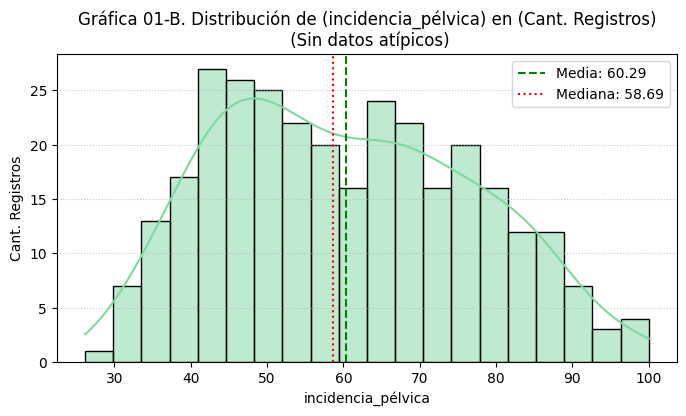

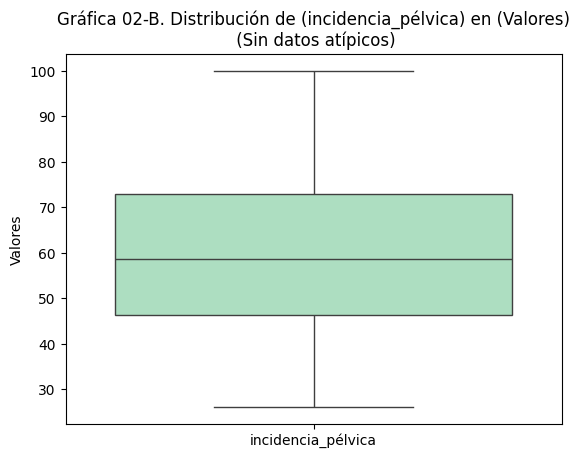

In [48]:
# Histograma de incidencia_pélvica
plt.figure(figsize=(8, 4))
sns.histplot(df_sin_atipicos['incidencia_pélvica'], bins=20, kde=True, color='#7ED8A0')

# Calcular media y mediana
media = df_sin_atipicos['incidencia_pélvica'].mean()
mediana = df_sin_atipicos['incidencia_pélvica'].median()

# Añadir líneas de media y mediana
plt.axvline(media, color='green', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='red', linestyle=':', label=f'Mediana: {mediana:.2f}')

plt.title('Gráfica 01-B. Distribución de (incidencia_pélvica) en (Cant. Registros)\n (Sin datos atípicos)')
plt.xlabel('incidencia_pélvica')
plt.ylabel('Cant. Registros')
plt.legend() # Mostrar la leyenda para identificar las líneas
plt.grid(axis='y', linestyle='dotted', alpha=0.7) # Añadir líneas de cuadrícula punteadas en el eje Y
plt.show()


# Boxplots de incidencia_pélvica
print('\n')
sns.boxplot(data=df_sin_atipicos[["incidencia_pélvica"]], color='#A5E6BF')
plt.title("Gráfica 02-B. Distribución de (incidencia_pélvica) en (Valores)\n (Sin datos atípicos)")
# plt.xlabel("Título eje X")
plt.ylabel("Valores")
plt.show()

<b>4.2. Inclinación pélvica</b>

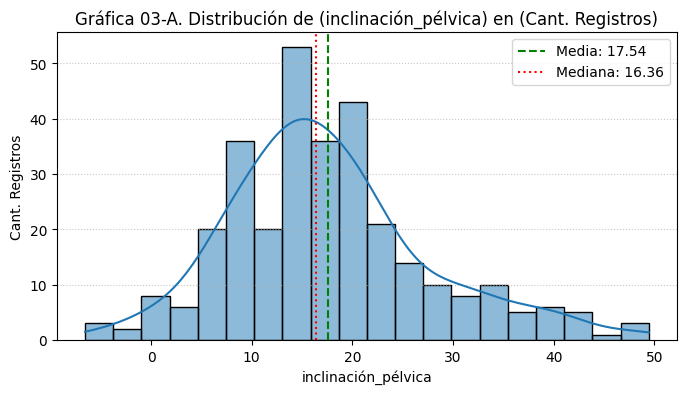

In [49]:
# Histograma de inclinación_pélvica

plt.figure(figsize=(8, 4))
sns.histplot(df['inclinación_pélvica'], bins=20, kde=True)

# Calcular media y mediana
media = df['inclinación_pélvica'].mean()
mediana = df['inclinación_pélvica'].median()

# Añadir líneas de media y mediana
plt.axvline(media, color='green', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='red', linestyle=':', label=f'Mediana: {mediana:.2f}')

plt.title('Gráfica 03-A. Distribución de (inclinación_pélvica) en (Cant. Registros)')
plt.xlabel('inclinación_pélvica')
plt.ylabel('Cant. Registros')
plt.legend() # Mostrar la leyenda para identificar las líneas
plt.grid(axis='y', linestyle='dotted', alpha=0.7) # Añadir líneas de cuadrícula punteadas en el eje Y
plt.show()

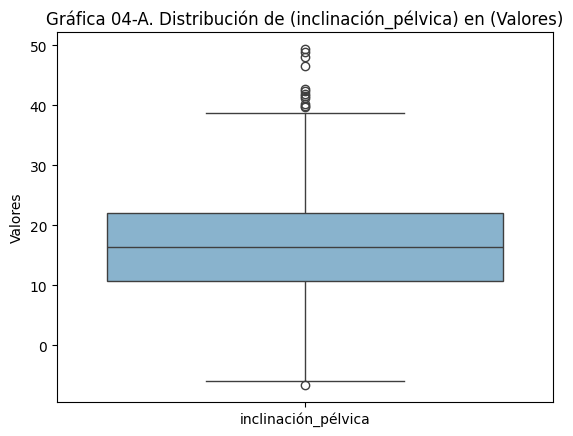

In [50]:
# Boxplots de inclinación_pélvica

sns.boxplot(data=df[["inclinación_pélvica"]], color="#7EB6D8")
plt.title("Gráfica 04-A. Distribución de (inclinación_pélvica) en (Valores)")
# plt.xlabel("Título eje X")
plt.ylabel("Valores")
plt.show()

In [51]:
# Gestión de datos atípicos
# Imputación por la mediana (Reemplazar los valores atípicos por la mediana)
# Si la distribución es asimétrica o los extremos son grandes.
mediana = df_sin_atipicos['inclinación_pélvica'].median()

df_sin_atipicos['inclinación_pélvica'] = np.where(
(df_sin_atipicos['inclinación_pélvica'] < -3) | (df_sin_atipicos['inclinación_pélvica'] > 35), mediana, df_sin_atipicos['inclinación_pélvica'])

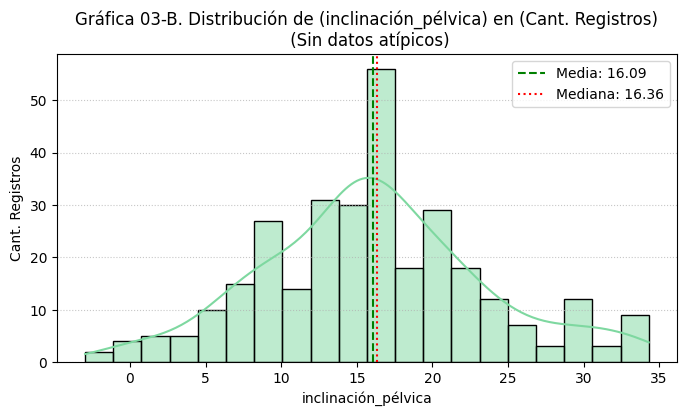

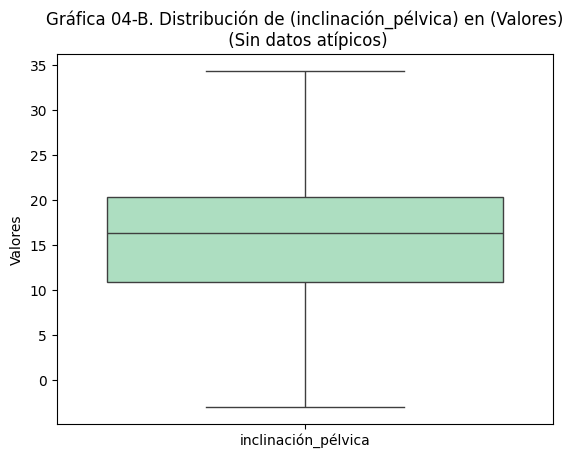

In [52]:
# Histograma de inclinación_pélvica
plt.figure(figsize=(8, 4))
sns.histplot(df_sin_atipicos['inclinación_pélvica'], bins=20, kde=True, color='#7ED8A0')

# Calcular media y mediana
media = df_sin_atipicos['inclinación_pélvica'].mean()
mediana = df_sin_atipicos['inclinación_pélvica'].median()

# Añadir líneas de media y mediana
plt.axvline(media, color='green', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='red', linestyle=':', label=f'Mediana: {mediana:.2f}')

plt.title('Gráfica 03-B. Distribución de (inclinación_pélvica) en (Cant. Registros)\n (Sin datos atípicos)')
plt.xlabel('inclinación_pélvica')
plt.ylabel('Cant. Registros')
plt.legend() # Mostrar la leyenda para identificar las líneas
plt.grid(axis='y', linestyle='dotted', alpha=0.7) # Añadir líneas de cuadrícula punteadas en el eje Y
plt.show()


# Boxplots de inclinación_pélvica
print('\n')
sns.boxplot(data=df_sin_atipicos[["inclinación_pélvica"]], color='#A5E6BF')
plt.title("Gráfica 04-B. Distribución de (inclinación_pélvica) en (Valores)\n (Sin datos atípicos)")
# plt.xlabel("Título eje X")
plt.ylabel("Valores")
plt.show()

<b>4.3. Angulo lordosis lumbar</b>

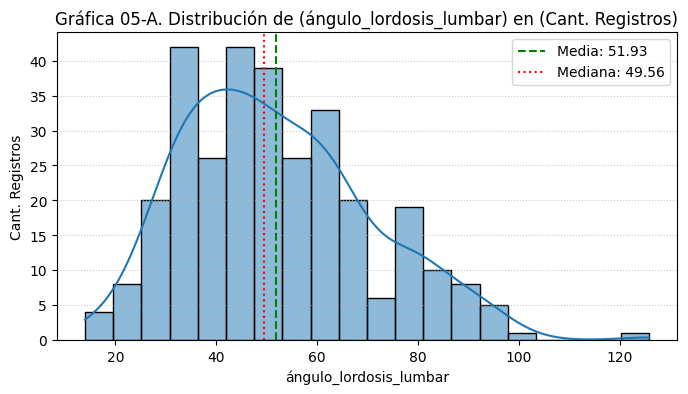

In [53]:
# Histograma de ángulo_lordosis_lumbar

plt.figure(figsize=(8, 4))
sns.histplot(df['ángulo_lordosis_lumbar'], bins=20, kde=True)

# Calcular media y mediana
media = df['ángulo_lordosis_lumbar'].mean()
mediana = df['ángulo_lordosis_lumbar'].median()

# Añadir líneas de media y mediana
plt.axvline(media, color='green', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='red', linestyle=':', label=f'Mediana: {mediana:.2f}')

plt.title('Gráfica 05-A. Distribución de (ángulo_lordosis_lumbar) en (Cant. Registros)')
plt.xlabel('ángulo_lordosis_lumbar')
plt.ylabel('Cant. Registros')
plt.legend() # Mostrar la leyenda para identificar las líneas
plt.grid(axis='y', linestyle='dotted', alpha=0.7) # Añadir líneas de cuadrícula punteadas en el eje Y
plt.show()

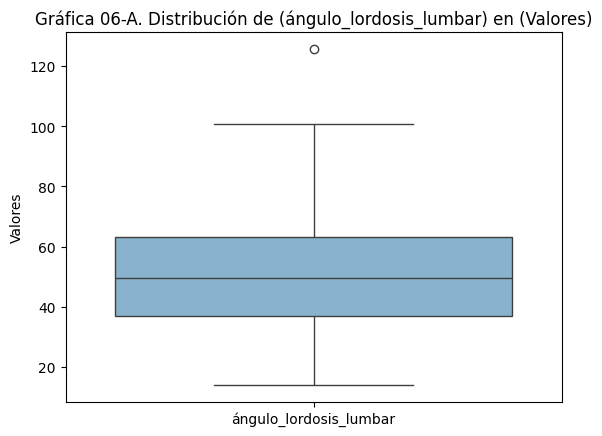

In [54]:
# Boxplots de ángulo_lordosis_lumbar

sns.boxplot(data=df[["ángulo_lordosis_lumbar"]], color="#7EB6D8")
plt.title("Gráfica 06-A. Distribución de (ángulo_lordosis_lumbar) en (Valores)")
# plt.xlabel("Título eje X")
plt.ylabel("Valores")
plt.show()

In [55]:
# Gestión de datos atípicos
# Winsorización (Reemplazar los valores atípicos por un valor máximo permitido)
# Si los outliers son reales pero extremos
df_sin_atipicos['ángulo_lordosis_lumbar'] = df_sin_atipicos['ángulo_lordosis_lumbar'].clip(upper=100)

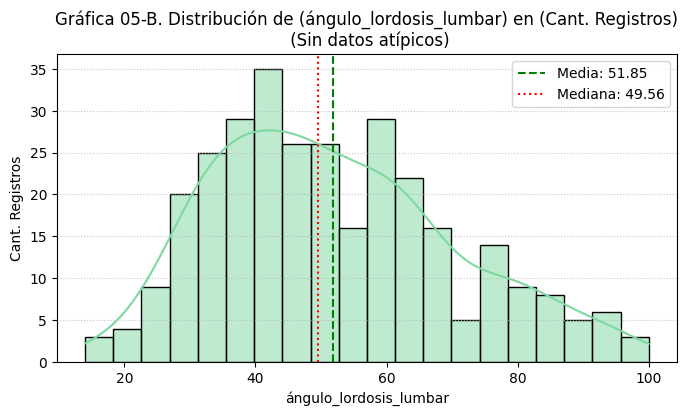

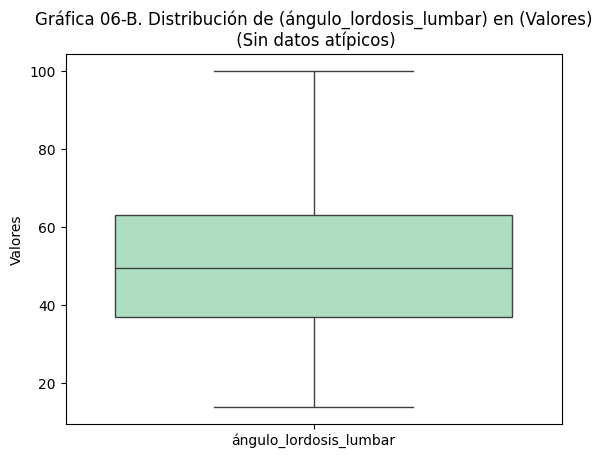

In [56]:
# Histograma de ángulo_lordosis_lumbar
plt.figure(figsize=(8, 4))
sns.histplot(df_sin_atipicos['ángulo_lordosis_lumbar'], bins=20, kde=True, color='#7ED8A0')

# Calcular media y mediana
media = df_sin_atipicos['ángulo_lordosis_lumbar'].mean()
mediana = df_sin_atipicos['ángulo_lordosis_lumbar'].median()

# Añadir líneas de media y mediana
plt.axvline(media, color='green', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='red', linestyle=':', label=f'Mediana: {mediana:.2f}')

plt.title('Gráfica 05-B. Distribución de (ángulo_lordosis_lumbar) en (Cant. Registros)\n (Sin datos atípicos)')
plt.xlabel('ángulo_lordosis_lumbar')
plt.ylabel('Cant. Registros')
plt.legend() # Mostrar la leyenda para identificar las líneas
plt.grid(axis='y', linestyle='dotted', alpha=0.7) # Añadir líneas de cuadrícula punteadas en el eje Y
plt.show()


# Boxplots de ángulo_lordosis_lumbar
print('\n')
sns.boxplot(data=df_sin_atipicos[["ángulo_lordosis_lumbar"]], color='#A5E6BF')
plt.title("Gráfica 06-B. Distribución de (ángulo_lordosis_lumbar) en (Valores)\n (Sin datos atípicos)")
# plt.xlabel("Título eje X")
plt.ylabel("Valores")
plt.show()

<b>4.4. Pendiente sacra</b>

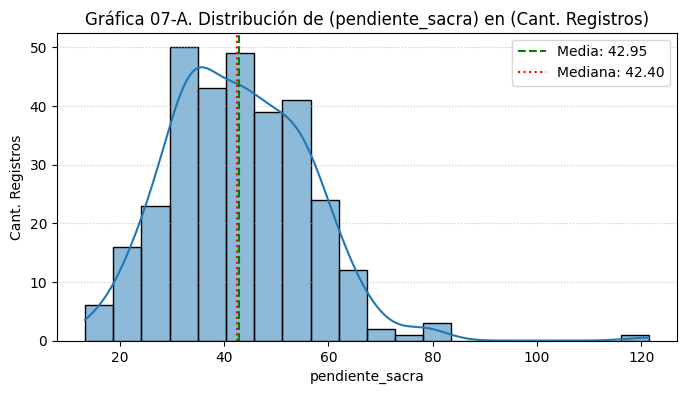

In [57]:
# Histograma de pendiente_sacra

plt.figure(figsize=(8, 4))
sns.histplot(df['pendiente_sacra'], bins=20, kde=True)

# Calcular media y mediana
media = df['pendiente_sacra'].mean()
mediana = df['pendiente_sacra'].median()

# Añadir líneas de media y mediana
plt.axvline(media, color='green', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='red', linestyle=':', label=f'Mediana: {mediana:.2f}')

plt.title('Gráfica 07-A. Distribución de (pendiente_sacra) en (Cant. Registros)')
plt.xlabel('pendiente_sacra')
plt.ylabel('Cant. Registros')
plt.legend() # Mostrar la leyenda para identificar las líneas
plt.grid(axis='y', linestyle='dotted', alpha=0.7) # Añadir líneas de cuadrícula punteadas en el eje Y
plt.show()

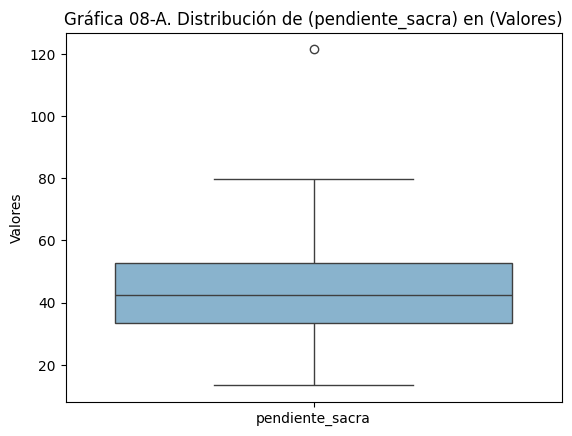

In [58]:
# Boxplots de pendiente_sacra

sns.boxplot(data=df[["pendiente_sacra"]], color="#7EB6D8")
plt.title("Gráfica 08-A. Distribución de (pendiente_sacra) en (Valores)")
# plt.xlabel("Título eje X")
plt.ylabel("Valores")
plt.show()

In [59]:
# Gestión de datos atípicos
# Imputación por la media (Reemplazar los valores atípicos por la media)
# Si los datos son simétricos (distribución normal) y los outliers son errores pequeños o pocos
media = df_sin_atipicos['pendiente_sacra'].mean()
df_sin_atipicos['pendiente_sacra'] = np.where(df_sin_atipicos['pendiente_sacra'] > 75, media, df_sin_atipicos['pendiente_sacra'])

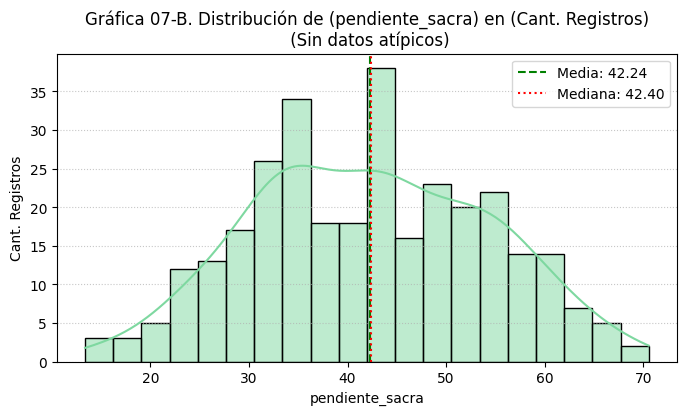

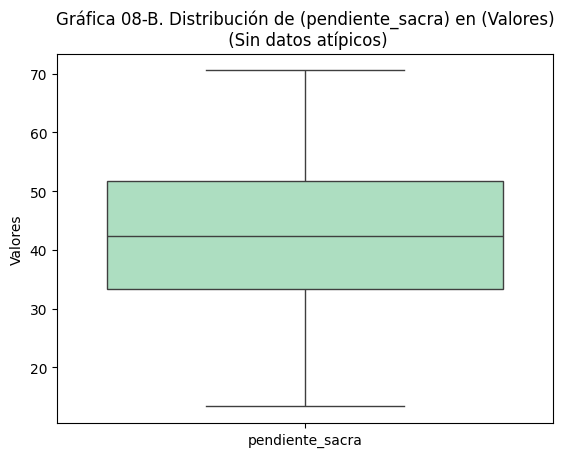

In [60]:
# Histograma de pendiente_sacra
plt.figure(figsize=(8, 4))
sns.histplot(df_sin_atipicos['pendiente_sacra'], bins=20, kde=True, color='#7ED8A0')

# Calcular media y mediana
media = df_sin_atipicos['pendiente_sacra'].mean()
mediana = df_sin_atipicos['pendiente_sacra'].median()

# Añadir líneas de media y mediana
plt.axvline(media, color='green', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='red', linestyle=':', label=f'Mediana: {mediana:.2f}')

plt.title('Gráfica 07-B. Distribución de (pendiente_sacra) en (Cant. Registros)\n (Sin datos atípicos)')
plt.xlabel('pendiente_sacra')
plt.ylabel('Cant. Registros')
plt.legend() # Mostrar la leyenda para identificar las líneas
plt.grid(axis='y', linestyle='dotted', alpha=0.7) # Añadir líneas de cuadrícula punteadas en el eje Y
plt.show()


# Boxplots de pendiente_sacra
print('\n')
sns.boxplot(data=df_sin_atipicos[["pendiente_sacra"]], color='#A5E6BF')
plt.title("Gráfica 08-B. Distribución de (pendiente_sacra) en (Valores)\n (Sin datos atípicos)")
# plt.xlabel("Título eje X")
plt.ylabel("Valores")
plt.show()

<b>4.5. Radio pélvico</b>

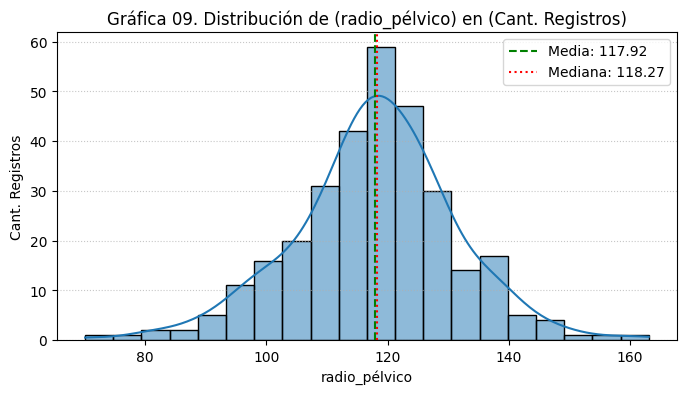

In [61]:
# Histograma de radio_pélvico

plt.figure(figsize=(8, 4))
sns.histplot(df['radio_pélvico'], bins=20, kde=True)

# Calcular media y mediana
media = df['radio_pélvico'].mean()
mediana = df['radio_pélvico'].median()

# Añadir líneas de media y mediana
plt.axvline(media, color='green', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='red', linestyle=':', label=f'Mediana: {mediana:.2f}')

plt.title('Gráfica 09. Distribución de (radio_pélvico) en (Cant. Registros)')
plt.xlabel('radio_pélvico')
plt.ylabel('Cant. Registros')
plt.legend() # Mostrar la leyenda para identificar las líneas
plt.grid(axis='y', linestyle='dotted', alpha=0.7) # Añadir líneas de cuadrícula punteadas en el eje Y
plt.show()

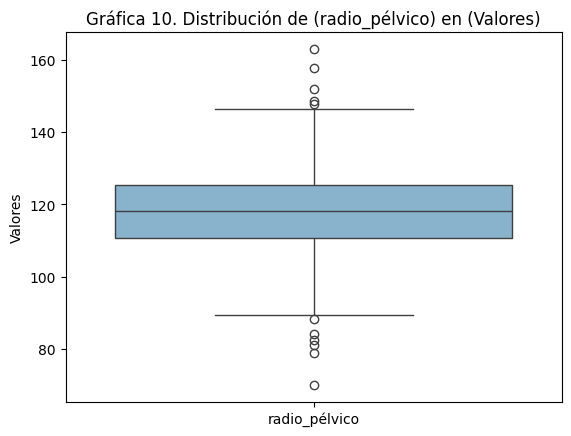

In [62]:
# Boxplots de radio_pélvico

sns.boxplot(data=df[["radio_pélvico"]], color="#7EB6D8")
plt.title("Gráfica 10. Distribución de (radio_pélvico) en (Valores)")
# plt.xlabel("Título eje X")
plt.ylabel("Valores")
plt.show()

<b>4.6. Grado espondilolistesis</b>


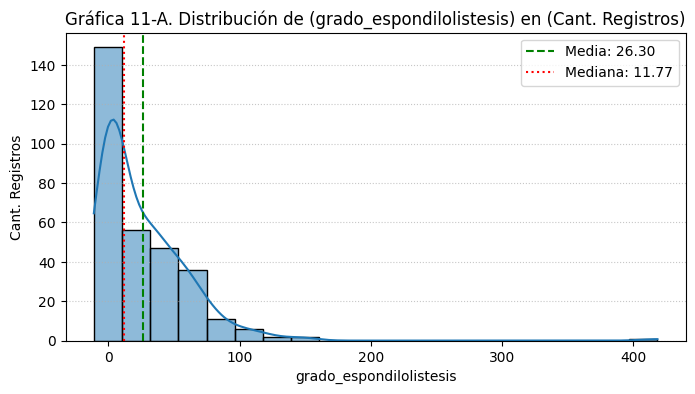

In [63]:
# Histograma de grado_espondilolistesis

plt.figure(figsize=(8, 4))
sns.histplot(df['grado_espondilolistesis'], bins=20, kde=True)

# Calcular media y mediana
media = df['grado_espondilolistesis'].mean()
mediana = df['grado_espondilolistesis'].median()

# Añadir líneas de media y mediana
plt.axvline(media, color='green', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='red', linestyle=':', label=f'Mediana: {mediana:.2f}')

plt.title('Gráfica 11-A. Distribución de (grado_espondilolistesis) en (Cant. Registros)')
plt.xlabel('grado_espondilolistesis')
plt.ylabel('Cant. Registros')
plt.legend() # Mostrar la leyenda para identificar las líneas
plt.grid(axis='y', linestyle='dotted', alpha=0.7) # Añadir líneas de cuadrícula punteadas en el eje Y
plt.show()

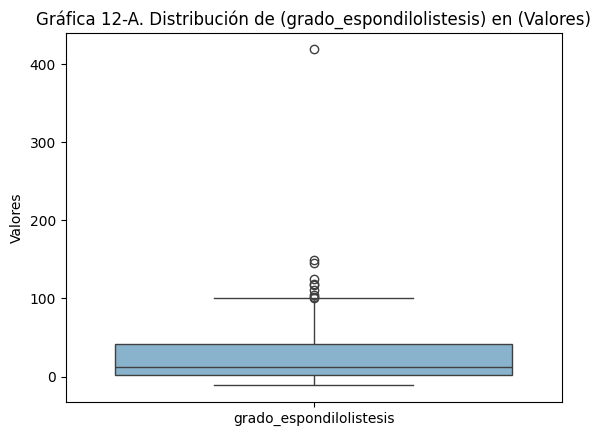

In [64]:
# Boxplots de grado_espondilolistesis

sns.boxplot(data=df[["grado_espondilolistesis"]], color="#7EB6D8")
plt.title("Gráfica 12-A. Distribución de (grado_espondilolistesis) en (Valores)")
# plt.xlabel("Título eje X")
plt.ylabel("Valores")
plt.show()

In [65]:
# Gestión de datos atípicos
# Imputación por la mediana (Reemplazar los valores atípicos por la mediana)
# Si la distribución es asimétrica o los extremos son grandes.
mediana = df_sin_atipicos['grado_espondilolistesis'].median()

df_sin_atipicos['grado_espondilolistesis'] = np.where(
(df_sin_atipicos['grado_espondilolistesis'] < -12) | (df_sin_atipicos['grado_espondilolistesis'] > 80), mediana, df_sin_atipicos['grado_espondilolistesis'])

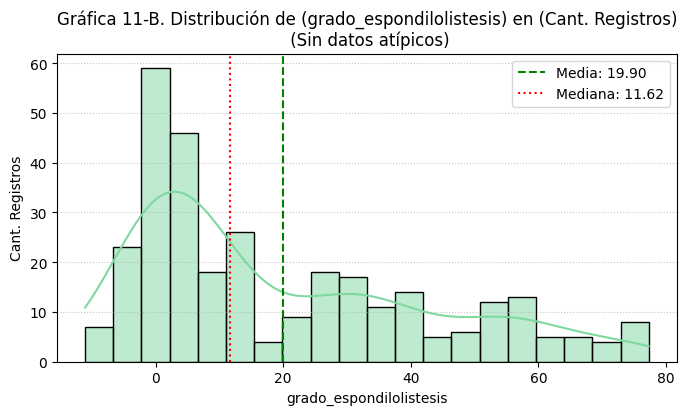

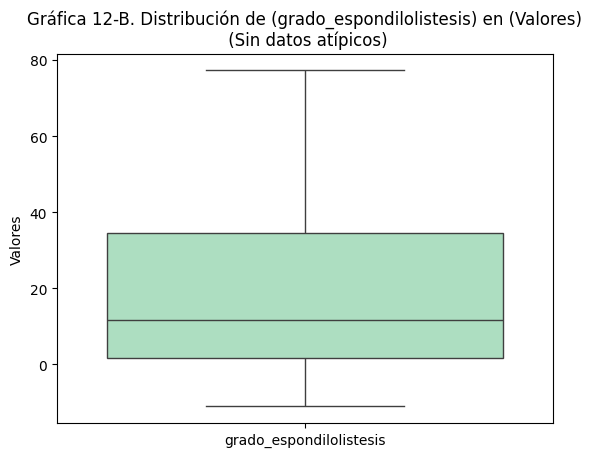

In [66]:
# Histograma de grado_espondilolistesis
plt.figure(figsize=(8, 4))
sns.histplot(df_sin_atipicos['grado_espondilolistesis'], bins=20, kde=True, color='#7ED8A0')

# Calcular media y mediana
media = df_sin_atipicos['grado_espondilolistesis'].mean()
mediana = df_sin_atipicos['grado_espondilolistesis'].median()

# Añadir líneas de media y mediana
plt.axvline(media, color='green', linestyle='--', label=f'Media: {media:.2f}')
plt.axvline(mediana, color='red', linestyle=':', label=f'Mediana: {mediana:.2f}')

plt.title('Gráfica 11-B. Distribución de (grado_espondilolistesis) en (Cant. Registros)\n (Sin datos atípicos)')
plt.xlabel('grado_espondilolistesis')
plt.ylabel('Cant. Registros')
plt.legend() # Mostrar la leyenda para identificar las líneas
plt.grid(axis='y', linestyle='dotted', alpha=0.7) # Añadir líneas de cuadrícula punteadas en el eje Y
plt.show()


# Boxplots de pendiente_sacra
print('\n')
sns.boxplot(data=df_sin_atipicos[["grado_espondilolistesis"]], color='#A5E6BF')
plt.title("Gráfica 12-B. Distribución de (grado_espondilolistesis) en (Valores)\n (Sin datos atípicos)")
# plt.xlabel("Título eje X")
plt.ylabel("Valores")
plt.show()

<b>4.7. Resultado después de la gestión de (Datos atípicos)</b>

In [67]:
print("incidencia_pélvica")
variable = df["incidencia_pélvica"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}")
print("(Sin datos atípicos)")
variable = df_sin_atipicos["incidencia_pélvica"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

print("inclinación_pélvica")
variable = df["inclinación_pélvica"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}")
print("(Sin datos atípicos)")
variable = df_sin_atipicos["inclinación_pélvica"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

print("ángulo_lordosis_lumbar")
variable = df["ángulo_lordosis_lumbar"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}")
print("(Sin datos atípicos)")
variable = df_sin_atipicos["ángulo_lordosis_lumbar"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

print("pendiente_sacra")
variable = df["pendiente_sacra"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}")
print("(Sin datos atípicos)")
variable = df_sin_atipicos["pendiente_sacra"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

print("radio_pélvico")
variable = df["radio_pélvico"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}")
print("(Sin datos atípicos)")
variable = df_sin_atipicos["radio_pélvico"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

print("grado_espondilolistesis")
variable = df["grado_espondilolistesis"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}")
print("(Sin datos atípicos)")
variable = df_sin_atipicos["grado_espondilolistesis"]
valor = variable.min()
print(f"mínima:\t\t{valor}")
valor = variable.max()
print(f"máximo:\t\t{valor}")
valor = variable.mean()
print(f"media:\t\t{valor}")
valor = variable.median()
print(f"mediana:\t{valor}\n")

incidencia_pélvica
mínima:		26.14792141
máximo:		129.8340406
media:		60.49665292951613
mediana:	58.691038135
(Sin datos atípicos)
mínima:		26.14792141
máximo:		100.0
media:		60.290517587580645
mediana:	58.691038135

inclinación_pélvica
mínima:		-6.554948347
máximo:		49.4318636
media:		17.542821967970966
mediana:	16.35768863
(Sin datos atípicos)
mínima:		-2.970024337
máximo:		34.31098931
media:		16.088687359680645
mediana:	16.35768863

ángulo_lordosis_lumbar
mínima:		14.0
máximo:		125.7423855
media:		51.93092960345161
mediana:	49.56239828
(Sin datos atípicos)
mínima:		14.0
máximo:		100.0
media:		51.845488941193544
mediana:	49.56239828

pendiente_sacra
mínima:		13.3669307
máximo:		121.4295656
media:		42.95383096141936
mediana:	42.404912075
(Sin datos atípicos)
mínima:		13.3669307
máximo:		70.55996517
media:		42.241723944216446
mediana:	42.404912075

radio_pélvico
mínima:		70.08257486
máximo:		163.0710405
media:		117.92065502380645
mediana:	118.2681783
(Sin datos atípicos)
mínima:		70.082

## <b>5. Ingeniería de características</b>

<b>5.1. Eliminar columnas irrelevantes</b>

In [68]:
df_sin_atipicos = df_sin_atipicos.drop(columns=['índice'])

<b>5.2. Realizar escalamiento de variables</b>

In [69]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_sin_atipicos_scaled = pd.DataFrame(scaler.fit_transform(df_sin_atipicos), columns=df_sin_atipicos.columns)

print(df_sin_atipicos_scaled)

     incidencia_pélvica  inclinación_pélvica  ángulo_lordosis_lumbar  \
0              0.165048             0.875134               -0.670769   
1             -1.280294            -0.816078               -1.470763   
2              0.515016             0.829901               -0.096111   
3              0.543053             1.159488               -0.413010   
4             -0.637788            -0.871440               -1.289753   
..                  ...                  ...                     ...   
305           -0.746880            -0.334679               -0.868612   
306           -0.383105             0.627227               -1.240246   
307            0.069707             0.894411               -0.311098   
308           -0.906711            -1.001266               -0.562558   
309           -1.594755            -1.491257               -0.833461   

     pendiente_sacra  radio_pélvico  grado_espondilolistesis     clase  
0          -0.147778      -1.447647                -0.881330  

<b>5.3. Validar correlaciones altas (>0.9) para eliminar variables redundantes</b>

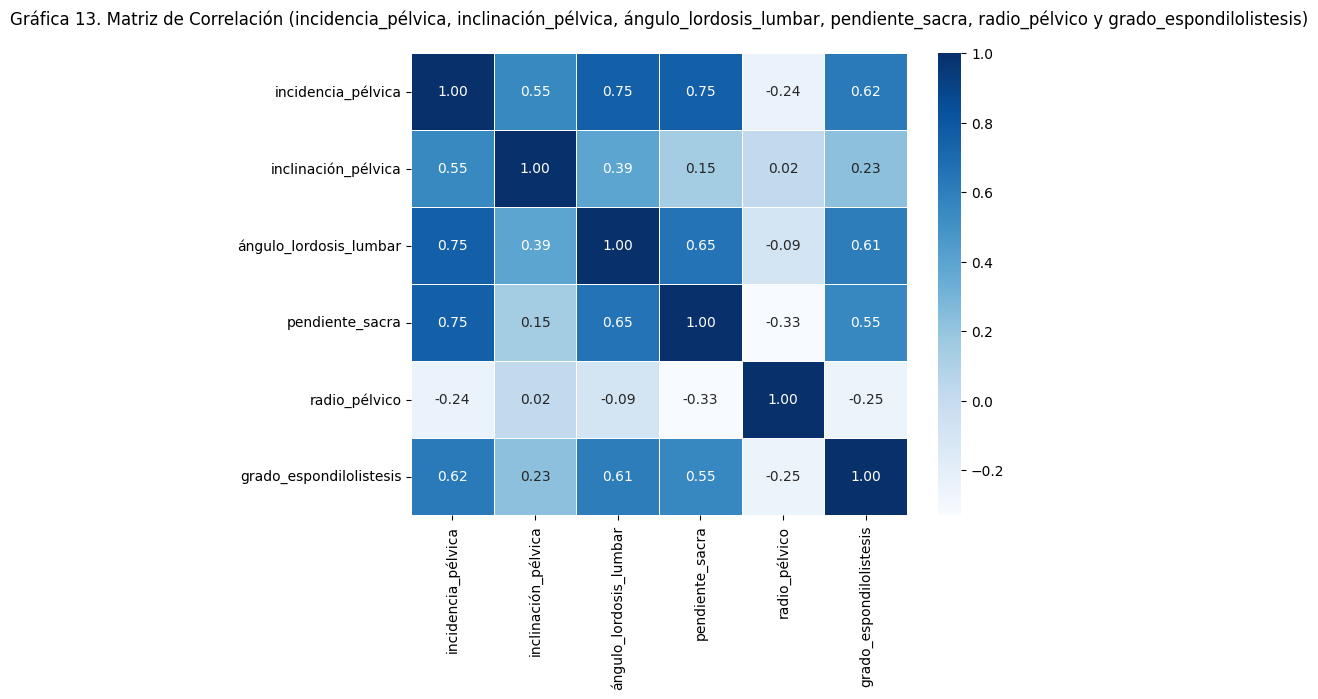

In [70]:
# Selecciona solo las columnas numéricas
#df_corr = df_sin_atipicos[["incidencia_pélvica", "inclinación_pélvica", "ángulo_lordosis_lumbar", "pendiente_sacra", "radio_pélvico", "grado_espondilolistesis"]]
df_corr = df_sin_atipicos_scaled[["incidencia_pélvica", "inclinación_pélvica", "ángulo_lordosis_lumbar", "pendiente_sacra", "radio_pélvico", "grado_espondilolistesis"]]

# Calcula la matriz de correlación
correlation_matrix = df_corr.corr()

# Crea el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,         # Muestra los valores dentro de cada celda
    #cmap="coolwarm",    # Escala de varios colores
    cmap="Blues",       # Escala de azules
    fmt=".2f",          # Formato de los números
    linewidths=0.5)     # Líneas divisorias entre celdas
plt.title("Gráfica 13. Matriz de Correlación (incidencia_pélvica, inclinación_pélvica, ángulo_lordosis_lumbar, pendiente_sacra, radio_pélvico y grado_espondilolistesis)\n")
plt.show()

Dimensiones del dataset: (310, 7)
Columnas: ['incidencia_pélvica', 'inclinación_pélvica', 'ángulo_lordosis_lumbar', 'pendiente_sacra', 'radio_pélvico', 'grado_espondilolistesis', 'clase']
Tamaño entrenamiento: (248, 6), prueba: (62, 6)

=== Entrenando KNN con GridSearchCV ===
Fitting 5 folds for each of 20 candidates, totalling 100 fits

=== Entrenando SVC con GridSearchCV ===
Fitting 5 folds for each of 48 candidates, totalling 240 fits

=== Entrenando XGBoost con RandomizedSearchCV ===
Fitting 5 folds for each of 30 candidates, totalling 150 fits

Mejores hiperparámetros encontrados:
KNN: {'knn__n_neighbors': 9, 'knn__p': 2, 'knn__weights': 'uniform'}
SVC: {'svc__C': 1, 'svc__class_weight': None, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
XGBoost: {'xgb__subsample': 1.0, 'xgb__reg_lambda': 1, 'xgb__n_estimators': 50, 'xgb__max_depth': 3, 'xgb__learning_rate': 0.05, 'xgb__colsample_bytree': 0.6}

=== Resultados KNN ===
Accuracy: 0.8226
Precision: 0.8444
Recall: 0.9048
F1-score: 0.87

,Modelo,Accuracy,Precision,Recall,F1
1,SVC,0.870968,0.886364,0.928571,0.906977
2,XGBoost,0.854839,0.866667,0.928571,0.896552
0,KNN,0.822581,0.844444,0.904762,0.873563


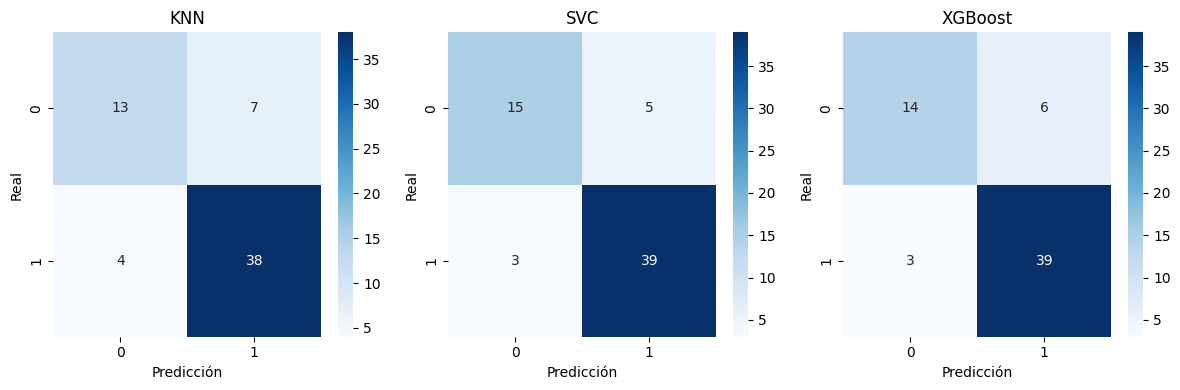


Modelos guardados correctamente en archivos .pkl


In [71]:
# ==========================================================
# OPTIMIZACIÓN Y EVALUACIÓN DE MODELOS SUPERVISADOS
# (KNN, SVC, XGBoost) sobre df_sin_atipicos
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib

# ==========================================================
# 1. CARGA Y DIVISIÓN DE LOS DATOS
# ==========================================================
# Se asume que df_sin_atipicos ya está en el entorno del notebook
# y contiene la columna objetivo 'clase'

print("Dimensiones del dataset:", df_sin_atipicos.shape)
print("Columnas:", df_sin_atipicos.columns.tolist())

TARGET_COL = 'clase'

# Separar características (X) y etiqueta (y)
X = df_sin_atipicos.drop(columns=[TARGET_COL])
y = df_sin_atipicos[TARGET_COL]

# Imputación de valores faltantes (si aplica)
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# División estratificada Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Tamaño entrenamiento: {X_train.shape}, prueba: {X_test.shape}")

# ==========================================================
# 2. DEFINICIÓN DE MODELOS Y ESPACIOS DE BÚSQUEDA
# ==========================================================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- KNN ---
pipe_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]
}

# --- SVC ---
pipe_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True, random_state=42))
])
param_grid_svc = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['rbf', 'linear', 'poly'],
    'svc__gamma': ['scale', 'auto'],
    'svc__class_weight': [None, 'balanced']
}

# --- XGBoost ---
pipe_xgb = Pipeline([
    ('scaler', StandardScaler()),  # opcional, mantiene consistencia de pipeline
    ('xgb', xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    ))
])
param_grid_xgb = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__subsample': [0.7, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__reg_lambda': [0, 1, 5]
}

# ==========================================================
# 3. BÚSQUEDA DE HIPERPARÁMETROS
# ==========================================================
n_jobs = -1
verbose = 1

print("\n=== Entrenando KNN con GridSearchCV ===")
gs_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=cv, scoring='accuracy', n_jobs=n_jobs, verbose=verbose)
gs_knn.fit(X_train, y_train)

print("\n=== Entrenando SVC con GridSearchCV ===")
gs_svc = GridSearchCV(pipe_svc, param_grid_svc, cv=cv, scoring='accuracy', n_jobs=n_jobs, verbose=verbose)
gs_svc.fit(X_train, y_train)

print("\n=== Entrenando XGBoost con RandomizedSearchCV ===")
rs_xgb = RandomizedSearchCV(pipe_xgb, param_grid_xgb, n_iter=30, cv=cv, scoring='accuracy',
                            n_jobs=n_jobs, verbose=verbose, random_state=42)
rs_xgb.fit(X_train, y_train)

best_knn = gs_knn.best_estimator_
best_svc = gs_svc.best_estimator_
best_xgb = rs_xgb.best_estimator_

print("\nMejores hiperparámetros encontrados:")
print("KNN:", gs_knn.best_params_)
print("SVC:", gs_svc.best_params_)
print("XGBoost:", rs_xgb.best_params_)

# ==========================================================
# 4. EVALUACIÓN FINAL EN TEST
# ==========================================================
models = {
    'KNN': best_knn,
    'SVC': best_svc,
    'XGBoost': best_xgb
}

results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='binary', zero_division=0)
    rec = recall_score(y_test, y_pred, average='binary', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='binary', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    results.append({
        'Modelo': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1,
        'CM': cm
    })

    print(f"\n=== Resultados {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Matriz de confusión:\n", cm)
    print("\nReporte de clasificación:")
    print(classification_report(y_test, y_pred, zero_division=0))

# ==========================================================
# 5. TABLA COMPARATIVA Y GRÁFICOS
# ==========================================================
df_resultados = pd.DataFrame([{
    'Modelo': r['Modelo'],
    'Accuracy': r['Accuracy'],
    'Precision': r['Precision'],
    'Recall': r['Recall'],
    'F1': r['F1']
} for r in results]).sort_values(by='F1', ascending=False)

print("\n\n=== Comparativa general ===")
display(df_resultados)

# Matrices de confusión
plt.figure(figsize=(12,4))
for i, r in enumerate(results):
    plt.subplot(1,3,i+1)
    sns.heatmap(r['CM'], annot=True, fmt='d', cmap='Blues')
    plt.title(r['Modelo'])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
plt.tight_layout()
plt.show()

# ==========================================================
# 6. GUARDAR MODELOS ENTRENADOS
# ==========================================================
joblib.dump(best_knn, 'modelo_knn_opt.pkl')
joblib.dump(best_svc, 'modelo_svc_opt.pkl')
joblib.dump(best_xgb, 'modelo_xgb_opt.pkl')

print("\nModelos guardados correctamente en archivos .pkl")